# Library

In [1]:
!pip install kmodes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
import pandas as pd
from IPython.display import Image, HTML
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
warnings.filterwarnings("ignore")


# Data Loading

In [35]:
url = "https://docs.google.com/spreadsheets/d/1-30mtmPNZCrBTkwQOqvKP9o9_LFnXGV8-BXokj6yQk0/export?format=csv&gid=0"

In [36]:
df = pd.read_csv(url)

In [37]:
df

,id,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,diabetic,halal,calories,image
0,1,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,1,1,93.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,2,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,1,1,69.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,3,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,1,1,386.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,4,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,1,1,74.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,5,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,1,1,204.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,1,1,240.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
251,252,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,1,1,993.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
252,253,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,0,1,824.0,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
253,254,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,0,1,242.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


# EDA

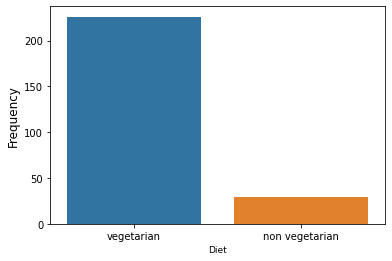

In [16]:
sns.countplot(df["diet"],label='count') #.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Diet', fontsize=9)
plt.show()

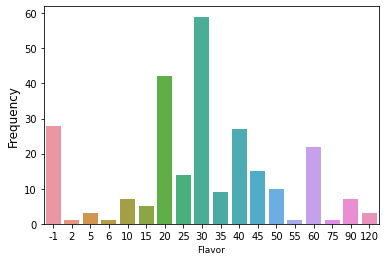

In [17]:
sns.countplot(df["cook_time"],label='count') #.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Flavor', fontsize=9)
plt.show()

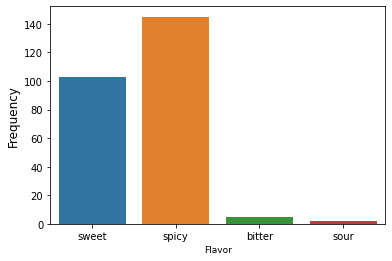

In [18]:
sns.countplot(df["flavor_profile"],label='count') #.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Flavor', fontsize=9)
plt.show()

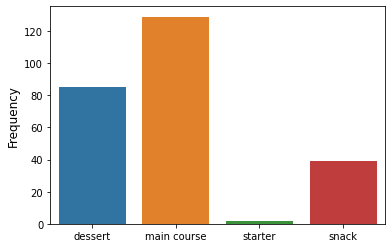

In [19]:
sns.countplot(df["course"],label='count') #.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel("")
plt.show()

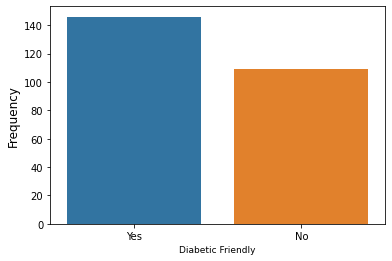

In [20]:
sns.countplot(df["diabetic"],label='count').set_xticklabels(['Yes','No'])
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Diabetic Friendly', fontsize=9)
plt.show()

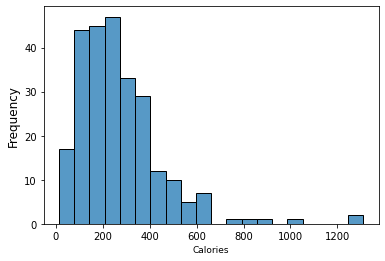

In [21]:
sns.histplot(df["calories"],label='count')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Calories', fontsize=9)
plt.show()

# Preprocessing

In [38]:
df["cook_time"]=df["cook_time"].replace(-1,df["cook_time"].mean())

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['diet_label'] = labelencoder.fit_transform(df['diet'])
df['flavor_profile_label'] = labelencoder.fit_transform(df['flavor_profile'])
df['course_label'] = labelencoder.fit_transform(df['course'])
df
#df["course"].value_counts()

,id,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,diabetic,halal,calories,image,diet_label,flavor_profile_label,course_label
0,1,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25.000000,sweet,dessert,1,1,93.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
1,2,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30.000000,sweet,dessert,1,1,69.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
2,3,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60.000000,sweet,dessert,1,1,386.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
3,4,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30.000000,sweet,dessert,1,1,74.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
4,5,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40.000000,sweet,dessert,1,1,204.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30.000000,sweet,dessert,1,1,240.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
251,252,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60.000000,sweet,dessert,1,1,993.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
252,253,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,31.803922,sweet,dessert,0,1,824.0,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",1,3,0
253,254,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45.000000,sweet,dessert,0,1,242.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0


In [40]:
data = df[['name','ingredients', 'cook_time','calories','diabetic','diet_label','flavor_profile_label','course_label']]

In [48]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['cook_time','calories']
scaler = MinMaxScaler().fit(data[columns_to_normalize])
data[columns_to_normalize] = pd.DataFrame(scaler.transform(data[columns_to_normalize]))

In [49]:
data

,name,ingredients,cook_time,calories,diabetic,diet_label,flavor_profile_label,course_label
0,Balu shahi,"Maida flour, yogurt, oil, sugar",0.194915,0.061633,1,1,3,0
1,Boondi,"Gram flour, ghee, sugar",0.237288,0.043143,1,1,3,0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",0.491525,0.287365,1,1,3,0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",0.237288,0.046995,1,1,3,0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",0.322034,0.147149,1,1,3,0
...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",0.237288,0.174884,1,1,3,0
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",0.491525,0.755008,1,1,3,0
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",0.252576,0.624807,0,1,3,0
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",0.364407,0.176425,0,1,3,0


In [27]:
x_scaled = data.iloc[:, 2:].values

In [28]:
x_scaled 

array([[0.19491525, 0.06163328, 1.        , 1.        , 3.        ,
        0.        ],
       [0.23728814, 0.0431433 , 1.        , 1.        , 3.        ,
        0.        ],
       [0.49152542, 0.28736518, 1.        , 1.        , 3.        ,
        0.        ],
       ...,
       [0.25257561, 0.6248074 , 0.        , 1.        , 3.        ,
        0.        ],
       [0.36440678, 0.17642527, 0.        , 1.        , 3.        ,
        0.        ],
       [0.25257561, 0.09175655, 1.        , 1.        , 3.        ,
        0.        ]])

In [29]:
df.describe()

,id,prep_time,cook_time,diabetic,halal,calories,diet_label,flavor_profile_label,course_label
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,128.000000,31.105882,35.405921,0.427451,0.988235,271.063843,0.886275,2.356863,0.835294
std,73.756356,72.554409,18.464586,0.495682,0.108037,181.144823,0.318102,0.603551,0.701748
min,1.000000,-1.000000,2.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,64.500000,10.000000,25.000000,0.000000,1.000000,145.000000,1.000000,2.000000,0.000000
50%,128.000000,10.000000,30.000000,0.000000,1.000000,240.000000,1.000000,2.000000,1.000000
75%,191.500000,20.000000,40.000000,1.000000,1.000000,358.500000,1.000000,3.000000,1.000000
max,255.000000,500.000000,120.000000,1.000000,1.000000,1311.000000,1.000000,3.000000,3.000000


# Clustering Model

In [ ]:
cost=[]
for i in range(2,20):
    kproto = KPrototypes(n_clusters=i, init='Cao')
    kproto.fit_predict(x_scaled, categorical=[2,3,4,5])
    cost.append(kproto.cost_)

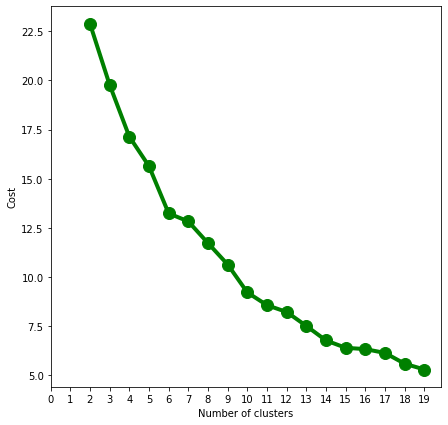

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.plot(range(2,20),cost, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(20))
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
plt.show()

In [ ]:
kproto = KPrototypes(n_clusters=20, init='Cao', random_state=42)
clusters= kproto.fit_predict(x_scaled, categorical=[2,3,4,5])

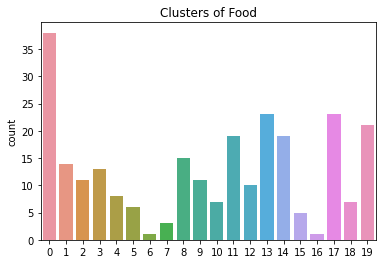

In [ ]:
sns.countplot(clusters)
plt.title('Clusters of Food')
plt.show()

In [ ]:
data.insert(loc=0, column='cluster', value=clusters)

In [ ]:
data

,cluster,name,ingredients,cook_time,calories,diabetic,diet_label,flavor_profile_label,course_label
0,19,Balu shahi,"Maida flour, yogurt, oil, sugar",0.194915,0.061633,1,1,3,0
1,19,Boondi,"Gram flour, ghee, sugar",0.237288,0.043143,1,1,3,0
2,1,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",0.491525,0.287365,1,1,3,0
3,19,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",0.237288,0.046995,1,1,3,0
4,17,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",0.322034,0.147149,1,1,3,0
...,...,...,...,...,...,...,...,...,...
250,17,Til Pitha,"Glutinous rice, black sesame seeds, gur",0.237288,0.174884,1,1,3,0
251,18,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",0.491525,0.755008,1,1,3,0
252,18,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",0.252576,0.624807,0,1,3,0
253,11,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",0.364407,0.176425,0,1,3,0


In [ ]:
df.insert(loc=0, column='cluster', value=clusters)

In [ ]:
df

,cluster,id,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,diabetic,halal,calories,image,diet_label,flavor_profile_label,course_label
0,19,1,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25.000000,sweet,dessert,1,1,93.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
1,19,2,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30.000000,sweet,dessert,1,1,69.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
2,1,3,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60.000000,sweet,dessert,1,1,386.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
3,19,4,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30.000000,sweet,dessert,1,1,74.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
4,17,5,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40.000000,sweet,dessert,1,1,204.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,17,251,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30.000000,sweet,dessert,1,1,240.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
251,18,252,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60.000000,sweet,dessert,1,1,993.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
252,18,253,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,31.803922,sweet,dessert,0,1,824.0,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",1,3,0
253,11,254,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45.000000,sweet,dessert,0,1,242.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0


# Classification Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.iloc[:,3:].values
y= data['cluster'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Total Rows Data X Training',X_train.shape[0])
print('Total Rows Data X Testing',X_test.shape[0])
print('Total Rows Data y Training',y_train.shape[0])
print('Total Rows Data y Testing',y_test.shape[0])

Total Rows Data X Training 204
Total Rows Data X Testing 51
Total Rows Data y Training 204
Total Rows Data y Testing 51


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model=knn.fit(X_train,y_train)
y_pred = model.predict(X_test)
cr = classification_report(y_test, y_pred)
print(cr)
print('Akurasi Model :', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         2
           3       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         4
          12       0.50      0.50      0.50         2
          13       0.75      1.00      0.86         3
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         4
          17       0.50      1.00      0.67         3
          18       0.00      0.00      0.00         1
          19       1.00      0.80      0.89         5

    accuracy              

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
model2= forest.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
cr2 = classification_report(y_test, y_pred2)
print(cr2)
print('Akurasi Model :', accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         2
           3       0.75      0.75      0.75         4
           5       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.75      1.00      0.86         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         4
          12       0.50      0.50      0.50         2
          13       0.75      1.00      0.86         3
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         4
          17       0.50      1.00      0.67         3
          18       0.00      0.00      0.00         1
          19       1.00      0.80      0.89         5

    accuracy              

In [ ]:
from sklearn.svm import SVC
svc = SVC()
model3=svc.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
cr3 = classification_report(y_test, y_pred3)
print(cr3)
print('Akurasi Model :', accuracy_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       0.00      0.00      0.00         4
           2       1.00      1.00      1.00         2
           3       0.57      1.00      0.73         4
           5       1.00      1.00      1.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         4
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         4
          17       0.23      1.00      0.38         3
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         5

    accuracy              

In [ ]:
#Cross Validation
scores = cross_val_score(forest, X_train, y_train, cv=5)
cross_validation=pd.DataFrame(scores, columns=['cross_validation'])
print (cross_validation)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

   cross_validation
0          0.902439
1          0.878049
2          0.878049
3          0.853659
4          0.925000
0.89 accuracy with a standard deviation of 0.02


### Classification with TensorFlow

In [ ]:
y_train

array([ 3,  9,  5, 17,  3,  8, 11,  5, 17,  0,  0, 19,  7, 19,  8, 11, 13,
        0, 14, 10,  2, 13, 11, 17,  4,  8,  9, 17,  9, 18,  3, 11, 18, 19,
        1,  0, 14,  1, 19, 19,  8,  1, 17,  0, 19, 17,  0, 14, 18, 10, 13,
       19,  8,  7, 17,  1, 11, 10,  8,  0, 17,  4,  3, 14, 11, 17,  4,  1,
       14, 18,  0,  9,  2, 17,  6, 12, 12, 19, 13,  0,  4, 10, 14, 17,  3,
        0,  2,  8, 19,  0,  0, 15, 13,  9,  0, 19, 13, 13,  8, 19, 11,  9,
       18,  8,  1,  9,  0,  9,  0,  3, 12, 11, 11,  0, 13,  0,  0,  8, 14,
       17,  8,  0, 12, 14, 19, 13, 13, 19, 11,  0, 14, 19, 17,  8, 17,  0,
       13, 17, 11, 17,  0, 19,  2, 13,  4,  1, 19, 13,  4, 14,  2, 12, 17,
       13, 13,  3, 14, 14, 11, 14,  4, 12, 12, 11, 13, 13, 13, 18, 12, 14,
       11,  8,  4,  8,  5,  0,  0, 17,  0, 16, 14,  2,  8, 11,  0,  2,  1,
        0,  2,  2,  0, 13,  1, 14,  1, 14, 17,  0, 13, 14,  3,  3, 17,  5],
      dtype=uint16)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_label= encoder.transform(y_train)
y_train_label = np_utils.to_categorical(y_train)
y_test_label = encoder.transform(y_test)
y_test_label = np_utils.to_categorical(y_test)

In [ ]:
y_train_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
pd.DataFrame(y_train_label)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
import tensorflow as tf

modeltf = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation=tf.nn.relu, 
                          input_shape=(6,)),
    tf.keras.layers.Dense(25, activation=tf.nn.relu),
    tf.keras.layers.Dense(25, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.softmax)
])

modeltf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                280       
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1025      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                520       
Total params: 2,475
Trainable params: 2,475
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modeltf.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = modeltf.fit(X_train, y_train_label, epochs=500, verbose=0)
history.history['accuracy'][-1]

0.9950980544090271

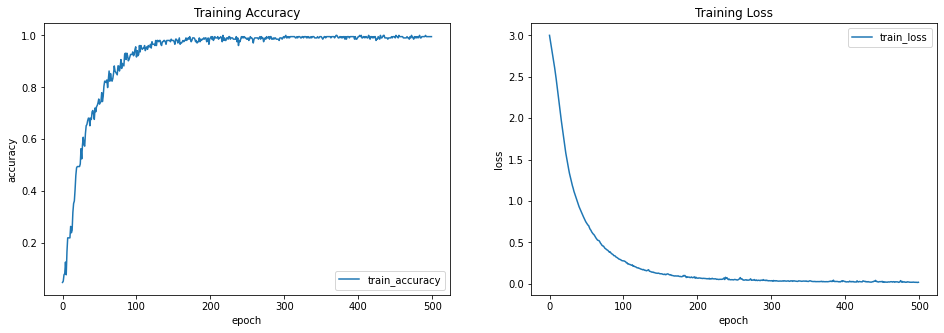

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='best')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'], loc='best')

In [ ]:
scores = modeltf.evaluate(X_test, y_test_label)
print("\n%s: %.2f%%" % (modeltf.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 4ms/step - loss: 1.1673 - accuracy: 0.8431

accuracy: 84.31%


In [ ]:
y_preds = modeltf.predict_classes(X_test)
y_pred = np.argmax(to_categorical(y_preds), axis = 1)
y_pred = encoder.inverse_transform(y_pred)

In [ ]:
y_preds

array([10, 18, 11,  0, 13, 13, 13,  5,  1,  0, 17, 11, 12,  9,  8,  0,  2,
        9, 13,  0,  0, 17,  5,  0, 11, 19, 19,  1, 19,  1, 15,  0,  3,  2,
        0, 15, 11, 17, 17,  3,  0, 19,  3,  0,  3,  2,  9, 19, 14, 17, 15])

In [ ]:
y_pred

array([10, 18, 11,  0, 13, 13, 13,  5,  1,  0, 17, 11, 12,  9,  8,  0,  2,
        9, 13,  0,  0, 17,  5,  0, 11, 19, 19,  1, 19,  1, 15,  0,  3,  2,
        0, 15, 11, 17, 17,  3,  0, 19,  3,  0,  3,  2,  9, 19, 14, 17, 15],
      dtype=uint16)

In [ ]:
print('Akurasi Model :', accuracy_score(y_test, y_preds))

Akurasi Model : 0.8431372549019608


# Input Data

vegetarian=1
non vegetarian=0

bitter=0
sour=1
spicy=2
sweet=3

dessert=0
main course=1
snack=2
starter=3

Diabetic Friendly
yes = 0
no = 1

halal
no = 0
yes = 1


In [ ]:
country = input("Country? *India available ")
new_cook = input("Cooking Time(Minutes)? ")
new_calories =input("Calories(Kcal)? ")
new_diabetes =input("Diabetic Friendly? \n(0) Yes \n(1) No \n Please Select by Number: ")
new_diet =input("Diet? \n(0) N\on Vegetarian \n(1) Vegetarian \n Please Select by Number: ")
new_flavor=input("Flavor? \n(0) Bitter \n(1) Sour \n(2) Spicy \n(3) Sweet \n Please Select by Number: ")
new_course=input("(0) Dessert \n(1) Main Course \n(2) Snack \n(3) Starter \n Please Select by Number: ")
print("Thank You!")

Country? *India available India


KeyboardInterrupt: ignored

# Predict New Data (Recommendation)

In [ ]:
new_df = {'new_cook': [int(new_cook)],
        'new_calories': [int(new_calories)],
        'new_diabetes': [int(new_diabetes)],
        'new_diet':[int(new_diet)],
        'new_flavor' : [int(new_flavor)],
        'new_course': [int(new_course)]}
new_df = pd.DataFrame(new_df)
newcolumns_to_normalize = ['new_cook','new_calories']
new_df[newcolumns_to_normalize] = pd.DataFrame(scaler.transform(new_df[newcolumns_to_normalize]))
X_new = new_df.values

In [ ]:
y_new_label = modeltf.predict_classes(X_new)
y_new_label 

array([11])

In [ ]:
new_df = {'new_cook': [int(new_cook)],
        'new_calories': [int(new_calories)],
        'new_diabetes': [int(new_diabetes)],
        'new_diet':[int(new_diet)],
        'new_flavor' : [int(new_flavor)],
        'new_course': [int(new_course)]}
new_df = pd.DataFrame(new_df)
newcolumns_to_normalize = ['new_cook','new_calories']
new_df[newcolumns_to_normalize] = pd.DataFrame(scaler.transform(new_df[newcolumns_to_normalize]))
X_new = new_df.values
y_new_label = modeltf.predict_classes(X_new)
y_new = np.argmax(to_categorical(y_new_label), axis = 1)
y_new = encoder.inverse_transform(y_new)
r= data.loc[data["cluster"]==int(y_new)]
recommendation = r.iloc[:,1:3].reset_index(drop=True)
recommendation

,name,ingredients
0,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,..."
1,Sheera,"Semolina, ghee, nuts, milk"
2,Singori,"Khoa, coconut, molu leaf"
3,Sohan halwa,"Corn flour, ghee, dry fruits"
4,Misti doi,"Milk, jaggery"
5,Rasabali,"Chenna, sweetened milk"
6,Ras malai,"Chhena, reduced milk, pistachio"
7,Chikki,"Peanuts, jaggery"
8,Double ka meetha,"Loaf bread, milk"
9,Poornalu,"Chana dal, jaggery"


In [ ]:
#Check Data
df.loc[df["cluster"]==int(y_new)]
#data.loc[data["flavor_profile_label"]==1]
#data["flavor_profile_label"].value_counts()

,cluster,id,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,diabetic,halal,calories,image,diet_label,flavor_profile_label,course_label
6,11,7,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50.000000,sweet,dessert,0,1,454.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
16,11,17,Sheera,"Semolina, ghee, nuts, milk",vegetarian,10,25.000000,sweet,dessert,0,1,494.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
17,11,18,Singori,"Khoa, coconut, molu leaf",vegetarian,10,20.000000,sweet,dessert,0,1,131.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
18,11,19,Sohan halwa,"Corn flour, ghee, dry fruits",vegetarian,10,60.000000,sweet,dessert,0,1,198.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
29,11,30,Misti doi,"Milk, jaggery",vegetarian,480,30.000000,sweet,dessert,0,1,362.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
32,11,33,Rasabali,"Chenna, sweetened milk",vegetarian,15,30.000000,sweet,dessert,0,1,331.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
33,11,34,Ras malai,"Chhena, reduced milk, pistachio",vegetarian,180,60.000000,sweet,dessert,0,1,376.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
39,11,40,Chikki,"Peanuts, jaggery",vegetarian,10,20.000000,sweet,dessert,0,1,111.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
41,11,42,Double ka meetha,"Loaf bread, milk",vegetarian,20,30.000000,sweet,dessert,0,1,407.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0
48,11,49,Poornalu,"Chana dal, jaggery",vegetarian,240,60.000000,sweet,dessert,0,1,236.0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...",1,3,0


,name,ingredients,image
0,Jalebi,"Maida, corn flour, baking soda, vinegar, curd, water, turmeric, saffron, cardamom",
1,Sheera,"Semolina, ghee, nuts, milk",
2,Singori,"Khoa, coconut, molu leaf",
3,Sohan halwa,"Corn flour, ghee, dry fruits",
4,Misti doi,"Milk, jaggery",
5,Rasabali,"Chenna, sweetened milk",
6,Ras malai,"Chhena, reduced milk, pistachio",
7,Chikki,"Peanuts, jaggery",
8,Double ka meetha,"Loaf bread, milk",
9,Poornalu,"Chana dal, jaggery",

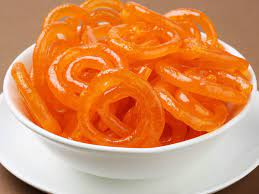
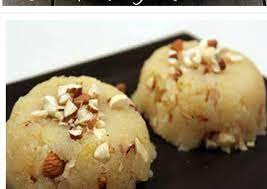
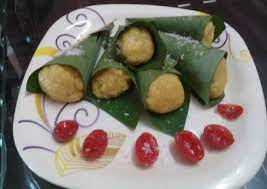
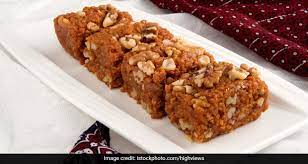
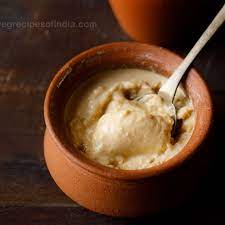
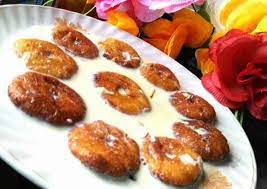
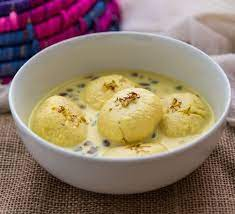
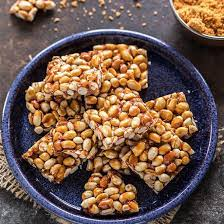
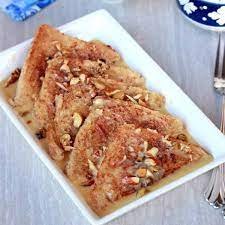
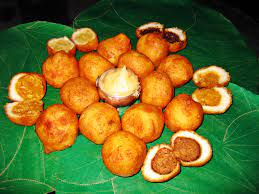
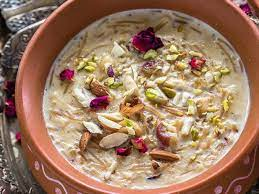
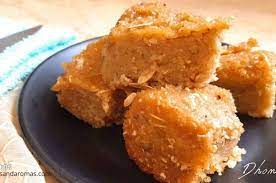
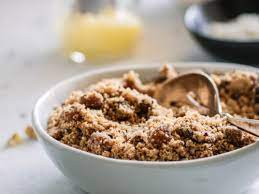
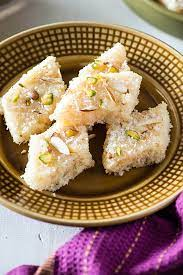
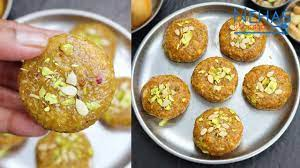
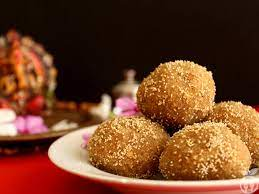
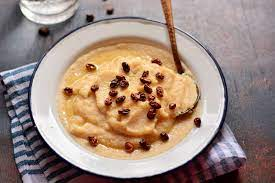
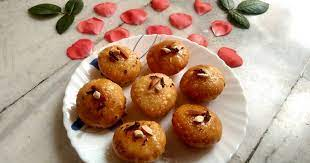

In [ ]:
dfgambar = df.loc[df["cluster"]==int(y_new)]
coldel =["cluster","id","diet","prep_time","cook_time","flavor_profile","course","diabetic","halal","calories","diet_label","flavor_profile_label","course_label"]	
dfgambar.drop(coldel, inplace=True, axis=1)
dfgambar=dfgambar.reset_index(drop=True)
def path_to_image_html(path):
    '''
     This function essentially convert the image url to 
     '<img src="'+ path + '"/>' format. And one can put any
     formatting adjustments to control the height, aspect ratio, size etc.
     within as in the below example. 
    '''
    return '<img src="'+ path + '" style=max-height:124px;"/>'
final_recommendation = HTML(dfgambar.to_html(escape=False ,formatters=dict(image=path_to_image_html)))
final_recommendation

# Convert to TFLite

In [ ]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(modeltf)
tfmodel = converter.convert()
open('food.tflite', 'wb').write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmpcxyf69l0/assets


12120

In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(modeltf,export_dir=export_dir)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/1\assets


In [ ]:
#@title Select mode of optimization
mode = "Default" #@param ["Default", "Storage", "Speed"]

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

converter.optimizations = [optimization]

tflite_model = converter.convert();

In [ ]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

12576